In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
data=pd.read_excel("D:\\VS code\\datasets\\Superstore.xls")
data.head()

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
style.use('ggplot')

##### 1)Scatter plot

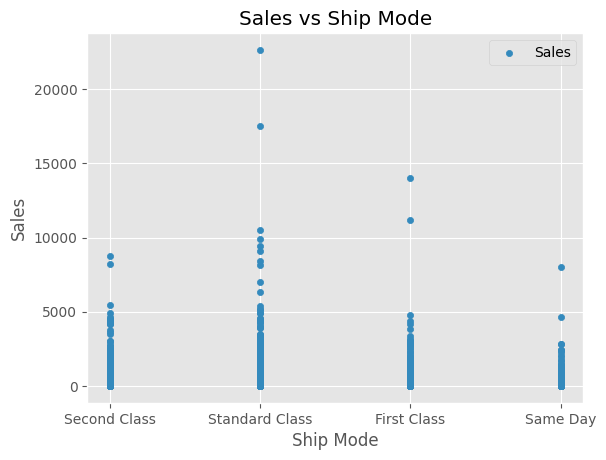

In [4]:
data.plot(kind="scatter",x='Ship Mode',y='Sales',label='Sales')
dt=data.head(50)
plt.title("Sales vs Ship Mode")
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.legend()
plt.show()

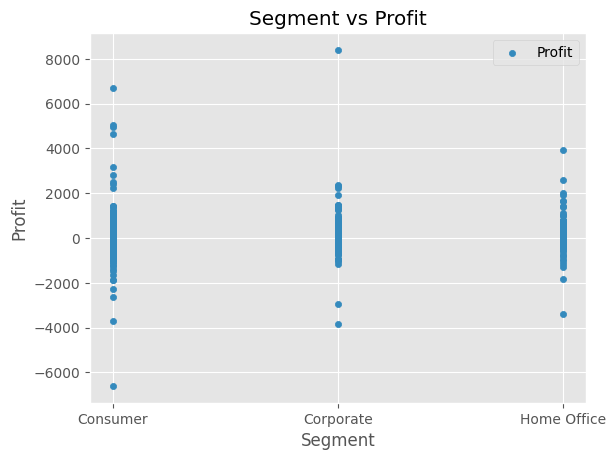

In [5]:
data.plot(kind="scatter",x='Segment',y='Profit',label='Profit')
dt=data.head(50)
plt.title("Segment vs Profit")
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.legend()
plt.show()

##### 2)Line Plot

Text(0.5, 1.0, 'analysis based on segment')

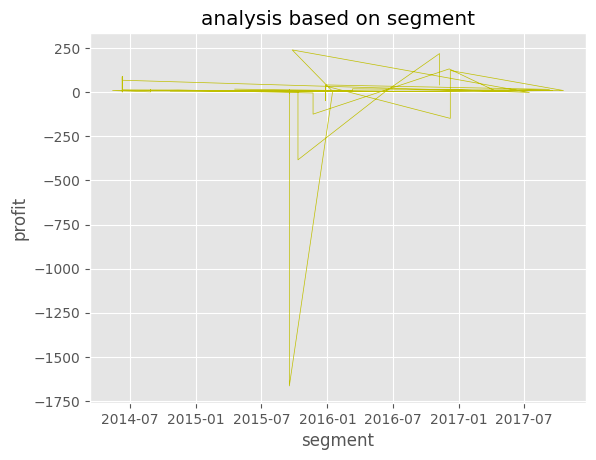

In [6]:
date=dt['Order Date']
prof=dt['Profit']
plt.plot(date,prof,"y",linestyle='-',linewidth=0.5)
plt.xlabel('segment')
plt.ylabel('profit')
plt.title('analysis based on segment')

In [7]:
sub = data[(data['Order Date']>='2014-06-01') & (data['Order Date']<='2014-06-30') ]

In [8]:
x=sub["no"]
y=sub["Profit"]

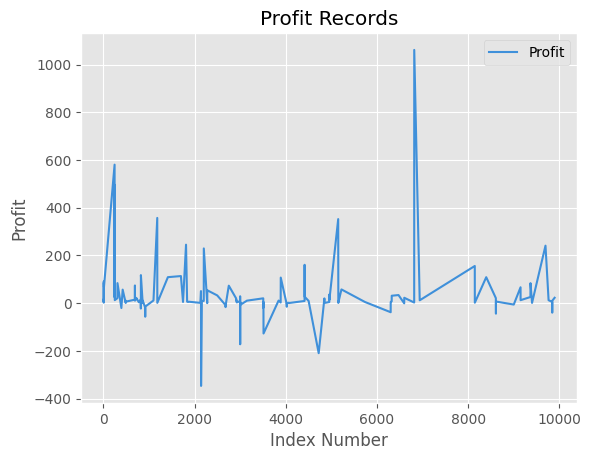

In [9]:
style.use("petroff10")

plt.plot(x,y,label='Profit')
plt.xlabel("Index Number")
plt.ylabel("Profit")
plt.title("Profit Records")
plt.legend()

##### 3)Pie plot

In [10]:
office_supplies = data[data['Category'] == 'Office Supplies']
furniture = data[data['Category'] == 'Furniture']
technology = data[data['Category'] == 'Technology']

In [11]:
office_supplies["Profit"].count()

np.int64(6026)

In [12]:
furniture["Profit"].count()

np.int64(2121)

([<matplotlib.patches.Wedge at 0x24f9d2f3440>,
 [Text(-1.0429540718163188, -0.3496381044476717, 'office_supplies'),
  Text(1.5473955986832104, -0.40689907984146334, 'furniture'),
  Text(0.713083866034262, 1.0869735047376412, 'technology')],
 [Text(-0.5688840391725375, -0.1907116933350936, '60.30%'),
  Text(1.063834474094707, -0.27974311739100605, '21.22%'),
  Text(0.4388208406364688, 0.6689067721462408, '18.48%')])

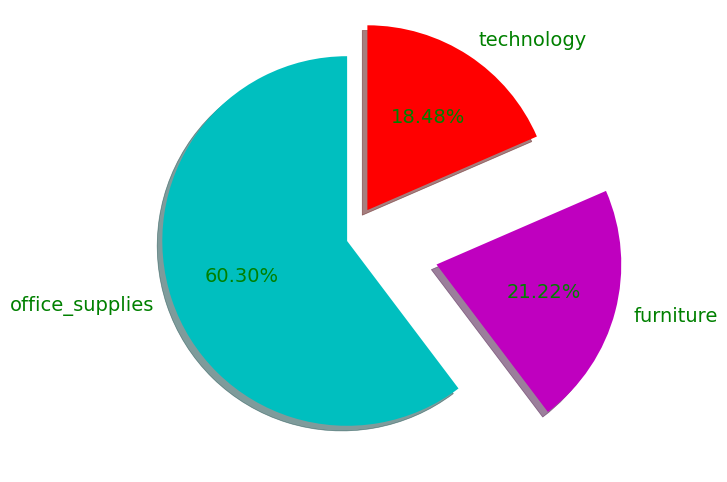

In [13]:
plt.figure(figsize=(12,6))
sl1=office_supplies["Profit"].count()
sl2=furniture["Profit"].count()
sl3=technology["Profit"].count()

slices = [sl1,sl2,sl3]
activities = ['office_supplies','furniture','technology']
cols = ['c','m','r']
plt.pie(slices,
        labels=activities,
       colors=cols,
        startangle=90,
        shadow= True,
        textprops = {'fontsize':14, 'c':'g'},
        explode=(0,0.5,0.2),
        autopct='%.2f%%')


In [14]:
##2
data['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [15]:
prof_sum_reg=data.groupby(["Region"]).sum(['Profit'])
prof_sum_reg


,no,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,11685963.0,151786150,501239.8908,8780,558.34,39706.3625
East,14073919.0,50171698,678781.2400,10618,414.00,91522.7800
South,8213294.0,55875052,391721.9050,6209,238.55,46749.4303
West,15971838.0,293739752,725457.8245,12266,350.20,108418.4489


In [16]:
sc1=prof_sum_reg.loc['Central','Profit']
sc2=prof_sum_reg.loc['East','Profit']
sc3=prof_sum_reg.loc['South','Profit']
sc4=prof_sum_reg.loc['West','Profit']

([<matplotlib.patches.Wedge at 0x24f9d226990>,
 [Text(0.9973003083045247, 0.4641035391544652, 'Central'),
  Text(-0.3595017607706698, 1.1448836115530645, 'East'),
  Text(-1.1626298027369208, -0.29713959983130556, 'South'),
  Text(0.4467929375545262, -1.113721720606812, 'West')],
 [Text(0.5439819863479225, 0.2531473849933446, '13.86%'),
  Text(-0.20970936044955735, 0.6678487734059542, '31.96%'),
  Text(-0.6782007182632038, -0.17333143323492822, '16.32%'),
  Text(0.2606292135734736, -0.6496710036873068, '37.86%')])

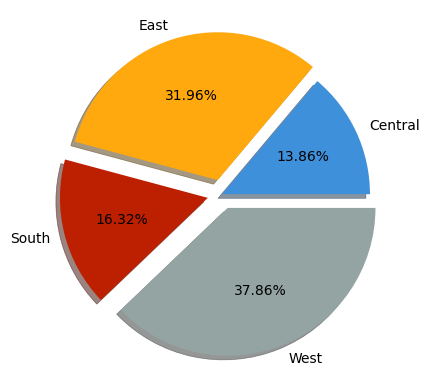

In [17]:
slices=[sc1,sc2,sc3,sc4]
activities1=['Central','East','South','West']
plt.pie(slices,labels=activities1,shadow=True,textprops={'fontsize':10,'c':'black'},explode=(0,0.1,0.1,0.1),autopct='%.2f%%')

##### 4)Bar Plot

In [18]:
shipm=data['Ship Mode']

In [19]:
profit=data['Profit']
# profit=data[data['Profit']>0]

In [20]:
data["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [21]:
sum_ship_mode=data.groupby(['Ship Mode']).sum(['Profit'])
sum_ship_mode['Profit']

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

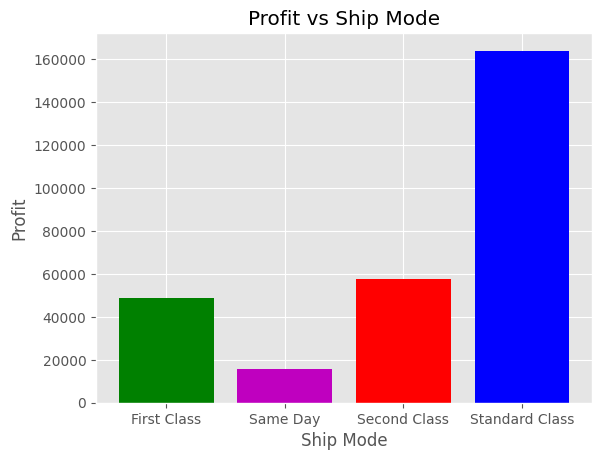

In [22]:
plt.bar(sum_ship_mode.index,sum_ship_mode['Profit'],color=['g','m','r','b'])
plt.title('Profit vs Ship Mode')
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()